To read more about the get API, visit the [docs](https://www.elastic.co/docs/reference/elasticsearch/mapping-reference/field-data-types)

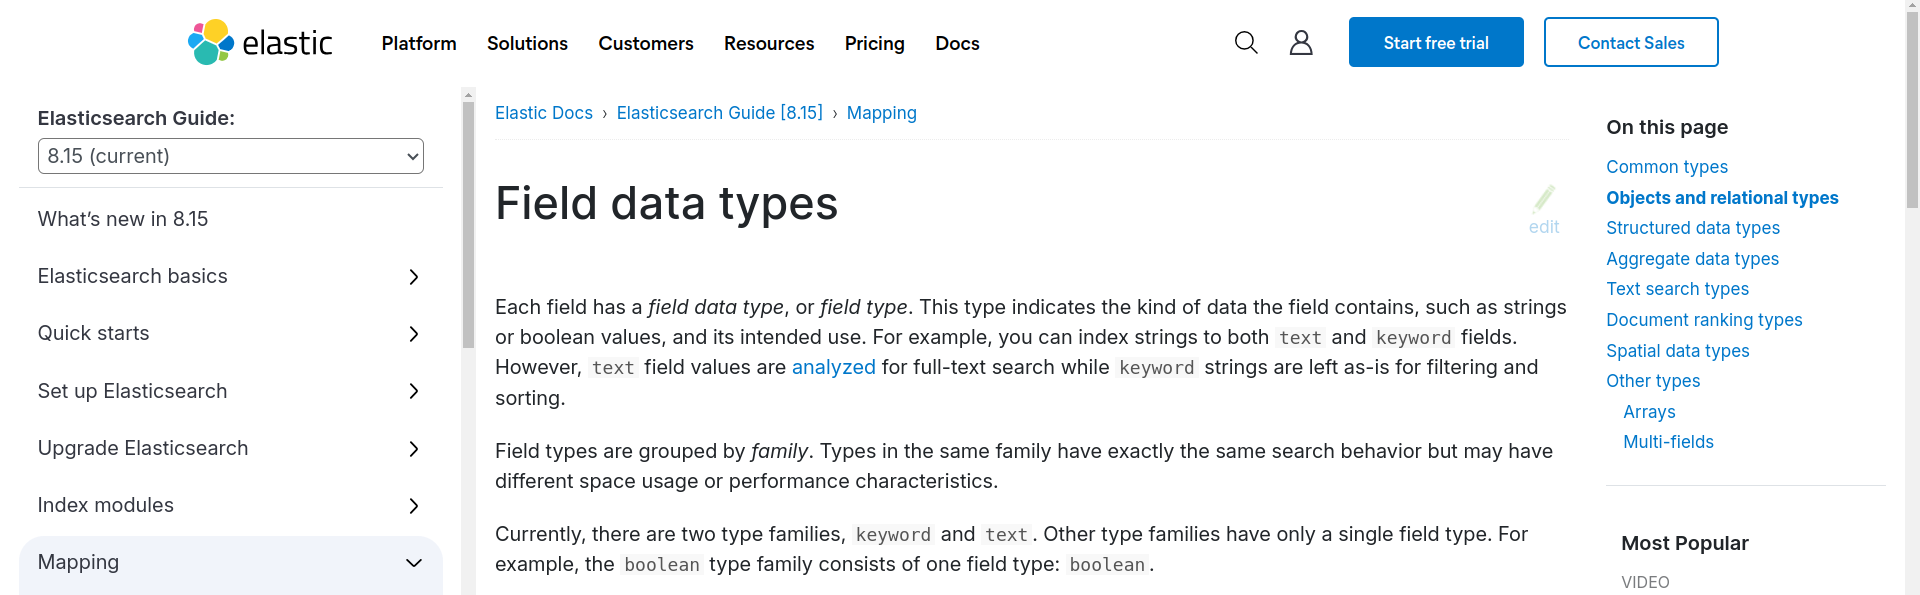

In [25]:
from IPython.display import Image, display

display(Image(filename="../images/field_data_types_docs.png"))


## Connect to Elastic Search

In [1]:
from pprint import pprint
from elasticsearch import Elasticsearch

es = Elasticsearch('http://localhost:9200')
client_info = es.info()
print('Connected to Elasticsearch!')
pprint(client_info.body)

Connected to Elasticsearch!
{'cluster_name': 'docker-cluster',
 'cluster_uuid': 'FQt-ffZfTpeh0Snf3pUAQw',
 'name': 'ae8b5b4be42b',
 'tagline': 'You Know, for Search',
 'version': {'build_date': '2024-08-05T10:05:34.233336849Z',
             'build_flavor': 'default',
             'build_hash': '1a77947f34deddb41af25e6f0ddb8e830159c179',
             'build_snapshot': False,
             'build_type': 'docker',
             'lucene_version': '9.11.1',
             'minimum_index_compatibility_version': '7.0.0',
             'minimum_wire_compatibility_version': '7.17.0',
             'number': '8.15.0'}}


### 1. Common Types

### 1.1 Binary

In [3]:
es.indices.delete(index='binary_index', ignore_unavailable=True)
es.indices.create(
    index='binary_index',
    mappings={
        "properties":{
            "image_data":{
                "type":"binary"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'binary_index'})

Import image and store in variable

In [4]:
import base64

image_path = "../images/field_data_types_docs.png"
with open(image_path, "rb") as image_file:
    image_bytes = image_file.read()
    image_base64 = base64.b64encode(image_bytes).decode("utf-8")

image_base64[:100]

'iVBORw0KGgoAAAANSUhEUgAAB4AAAAJTCAYAAADpMAvgAAAABHNCSVQICAgIfAhkiAAAABl0RVh0U29mdHdhcmUAZ25vbWUtc2Ny'

In [5]:
document = {
    "image_data": image_base64
}

response = es.index(index='binary_index', body=document)

# printing response
response

ObjectApiResponse({'_index': 'binary_index', '_id': 'WCrDKZoBqbZEoMTBDsrW', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 1.2 Others

In [6]:
es.indices.delete(index='other_common_data_types_index', ignore_unavailable=True)
es.indices.create(
    index='other_common_data_types_index',
    mappings={
        "properties":{
            "book_reference":{
                "type":"keyword"
            },
            "price":{
                "type":"float"
            },
            "publish_date":{
                "type":"date"
            },
            "is_available":{
                "type":"boolean"
            },
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'other_common_data_types_index'})

Now inserting document in `other_common_data_types_index`

In [7]:
document = {
    "book_reference":"978-1617294433",
    "price":44.99,
    "publish_date":"2025-07-14",
    "is_available":True
}

# inserting document to index
response = es.index(index='other_common_data_types_index', body=document)

# printing response
response



ObjectApiResponse({'_index': 'other_common_data_types_index', '_id': 'WSrLKZoBqbZEoMTBWMry', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 2. Object Types

### 2.1 Object

In [8]:
es.indices.delete(index='object_index', ignore_unavailable=True)
es.indices.create(
    index='object_index',
    mappings={
        "properties":{
            "author":{
                "properties":{
                    "first_name":{
                        "type":"text"
                    },
                    "last_name":{
                        "type":"text"
                    }
                }
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'object_index'})

In [9]:
document={
    "author":{
        "first_name":"Sanjiv",
        "last_name":"Paul"
    }
}

# inserting document to index
response = es.index(index='object_index', body=document)

# printing response
response

ObjectApiResponse({'_index': 'object_index', '_id': 'WirPKZoBqbZEoMTB9sp3', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 2.2 Flattened Object

In [10]:
es.indices.delete(index='flattened_object_index', ignore_unavailable=True)
es.indices.create(
    index='flattened_object_index',
    mappings={
        "properties":{
            "author":{
                "type":"flattened"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'flattened_object_index'})

Here `author` behaving like object accept author object

In [11]:
document={
    "author":{
        "first_name":"Sanjiv",
        "last_name":"Paul"
    }
}

# inserting document to index
response = es.index(index='flattened_object_index', body=document)

# printing response
response

ObjectApiResponse({'_index': 'flattened_object_index', '_id': 'WyrXKZoBqbZEoMTBUcoj', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 2.3 Nested object

In [12]:
es.indices.delete(index='nested_object_index', ignore_unavailable=True)
es.indices.create(
    index='nested_object_index',
    mappings={
        "properties": {
            "user":{
                "type":"nested",
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'nested_object_index'})

That means its accept multiple object as nested form like that

In [13]:
documents = [
    {
        "first_name":"Sanjiv",
        "last_name":"Paul"
    },
    {
        "first_name":"Rahul",
        "last_name":"Paul"
    }
]

response = es.index(index='nested_object_index', body={"user": documents})
response

ObjectApiResponse({'_index': 'nested_object_index', '_id': 'XCraKZoBqbZEoMTB0sq1', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 3. Text search types

### 3.1 Text

In [14]:
es.indices.delete(index='text_index', ignore_unavailable=True)
es.indices.create(
    index='text_index',
    mappings={
        "properties": {
            "email_body":{
                "type":"text"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_index'})

In [15]:
document = {
    "email_body": "Hello, this is a test email."
}

response = es.index(index='text_index', body=document)
response

ObjectApiResponse({'_index': 'text_index', '_id': 'XSrcKZoBqbZEoMTBbcqo', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 3.2 Completion

In [16]:
es.indices.delete(index='text_completion_index', ignore_unavailable=True)
es.indices.create(
    index='text_completion_index',
    mappings={
        "properties": {
            "suggest":{
                "type":"completion"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_completion_index'})

In [17]:
document_1 = {
    "suggest": {
        "input": ["Mars", "Planet"]
    }
}

document_2 = {
    "suggest": {
        "input": ["Andromeda", "Galaxy"]
    }
}

es.index(index='text_completion_index', body=document_1)
es.index(index='text_completion_index', body=document_2)

ObjectApiResponse({'_index': 'text_completion_index', '_id': 'XyrfKZoBqbZEoMTBQMqg', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

### 4. Spatial data types

### 4.1 Geo point

In [18]:
es.indices.delete(index='geo_point_index', ignore_unavailable=True)
es.indices.create(
    index='geo_point_index',
    mappings={
        "properties": {
            "location":{
                "type":"geo_point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_point_index'})

In [19]:
document = {
    "text":"Geopoint as an object using GeoJSON format",
    "location":{
        "type":"Point",
        "coordinates":[
            -71.34,
            41.12
        ]
    }
}

response = es.index(index='geo_point_index', body=document)
response
    
        

ObjectApiResponse({'_index': 'geo_point_index', '_id': 'YCriKZoBqbZEoMTBhMqP', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 4.2 Geo shape

In [20]:
es.indices.delete(index='geo_shape_index', ignore_unavailable=True)
es.indices.create(
    index='geo_shape_index',
    mappings={
        "properties": {
            "location": {
                "type": "geo_shape"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_shape_index'})

In [21]:
document_1 = {
    "location": {
        "type": "LineString",
        "coordinates": [
            [
                -77.03653,
                38.897676
            ],
            [
                -77.009051,
                38.889939
            ]
        ]
    }
}

document_2 = {
    "location": {
        "type": "Polygon",
        "coordinates": [
            [
                [100, 0],
                [101, 0],
                [101, 1],
                [100, 1],
                [100, 0],
            ],
            [
                [100.2, 0.2],
                [100.8, 0.2],
                [100.8, 0.8],
                [100.2, 0.8],
                [100.2, 0.2],
            ]
        ]
    }
}


es.index(index='geo_shape_index', body=document_1)
es.index(index='geo_shape_index', body=document_2)

ObjectApiResponse({'_index': 'geo_shape_index', '_id': 'YirkKZoBqbZEoMTBI8om', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

### 4.3 Point

In [22]:
es.indices.delete(index='point_index', ignore_unavailable=True)
es.indices.create(
    index='point_index',
    mappings={
        "properties": {
            "location": {
                "type": "point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'point_index'})

In [23]:
document = {
    "location":{
        "type":"Point",
        "coordinates":[
            -71.34,
            41.12
        ]
    }
}

response = es.index(index='point_index', body=document)
response

ObjectApiResponse({'_index': 'point_index', '_id': 'YyrlKZoBqbZEoMTB6MqQ', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})